<a href="https://colab.research.google.com/github/Vamshi-krishna-dev/EDA/blob/main/Amazon_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load The Data

In [2]:
filepath = '/content/Amazon Sales data.csv'

In [3]:
data = pd.read_csv(filepath, encoding = "unicode_escape")

In [4]:
data.shape

(100, 14)

In [5]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [6]:
data.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


# Clean and Process The Data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [8]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [9]:
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst = True)
data['Ship Datee'] = pd.to_datetime(data['Ship Date'], dayfirst = True)

<ipython-input-9-eafac6256301>:1: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst = True)
<ipython-input-9-eafac6256301>:2: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['Ship Datee'] = pd.to_datetime(data['Ship Date'], dayfirst = True)


# EDA(Exploartory Data Analysis)

* perform initial data analysis

In [10]:
data.describe()

,Order Date,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Ship Datee
count,100,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100
mean,2013-09-16 14:09:36,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05,2013-10-09 22:48:00
min,2010-02-02 00:00:00,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03,2010-02-25 00:00:00
25%,2012-02-14 12:00:00,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05,2012-02-24 18:00:00
50%,2013-07-12 12:00:00,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05,2013-08-11 12:00:00
75%,2015-04-07 00:00:00,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05,2015-04-28 00:00:00
max,2017-05-22 00:00:00,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06,2017-06-17 00:00:00
std,NaN,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05,NaN


In [11]:
sales_by_region = data.groupby('Region')['Total Revenue'].sum()
sales_by_region

Region
Asia                                 21347091.02
Australia and Oceania                14094265.13
Central America and the Caribbean     9170385.49
Europe                               33368932.11
Middle East and North Africa         14052706.58
North America                         5643356.55
Sub-Saharan Africa                   39672031.43
Name: Total Revenue, dtype: float64

In [12]:
sales_by_country = data.groupby('Country')['Total Revenue'].sum()
sales_by_country

Country
Albania            247956.32
Angola            2798046.49
Australia         2489933.49
Austria           1244708.40
Azerbaijan        4478800.21
                     ...    
The Gambia        5449517.95
Turkmenistan      5822036.20
Tuvalu            2533654.00
United Kingdom     188452.14
Zambia             623289.30
Name: Total Revenue, Length: 76, dtype: float64

In [13]:
sales_by_Item_Type = data.groupby('Item Type')['Total Revenue'].sum()
sales_by_Item_Type

Item Type
Baby Food          10350327.60
Beverages           2690794.60
Cereal              5322898.90
Clothes             7787292.80
Cosmetics          36601509.60
Fruits               466481.34
Household          29889712.29
Meat                4503675.75
Office Supplies    30585380.07
Personal Care       3980904.84
Snacks              2080733.46
Vegetables          3089057.06
Name: Total Revenue, dtype: float64

# Data Visualization

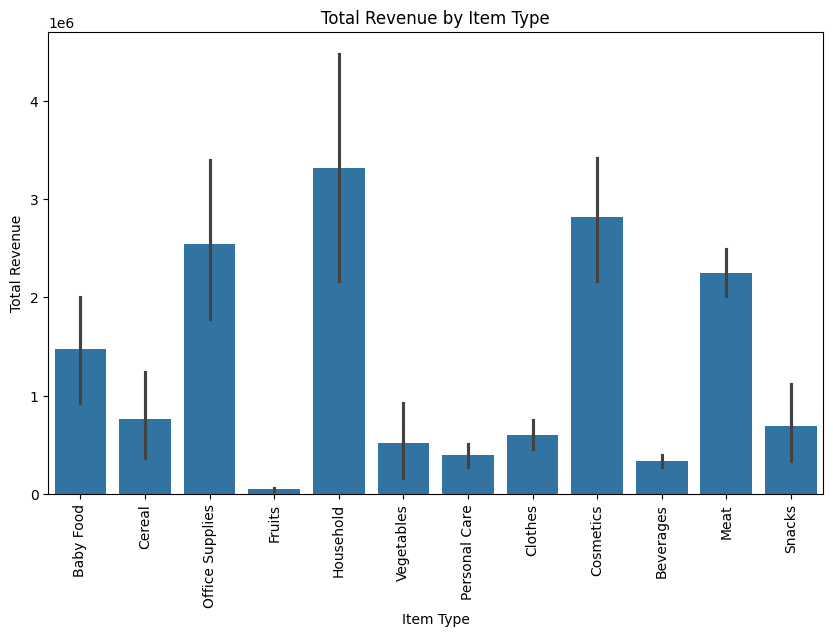

In [26]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Item Type',y = 'Total Revenue', data = data)
plt.xticks(rotation = 90)
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Item Type')
plt.show()

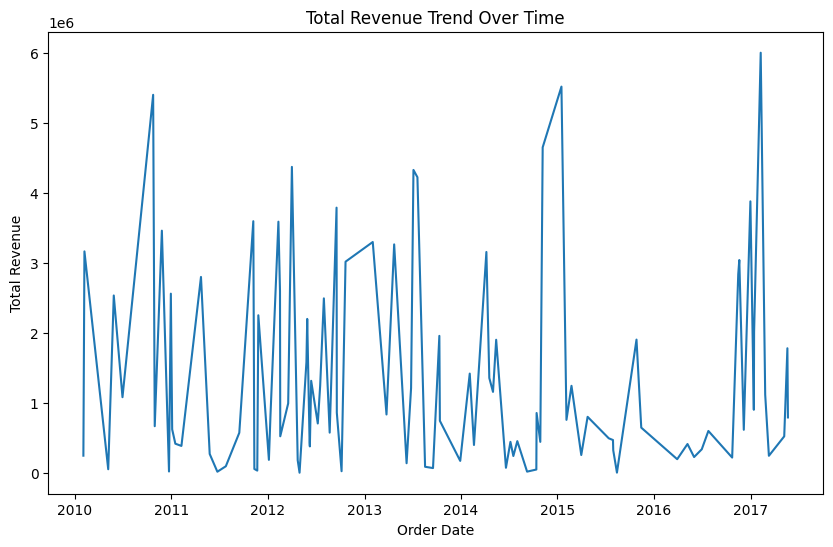

In [15]:
plt.figure(figsize =(10,6))
sns.lineplot(x = 'Order Date', y = 'Total Revenue', data = data)
plt.title('Total Revenue Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Revenue')
plt.show()

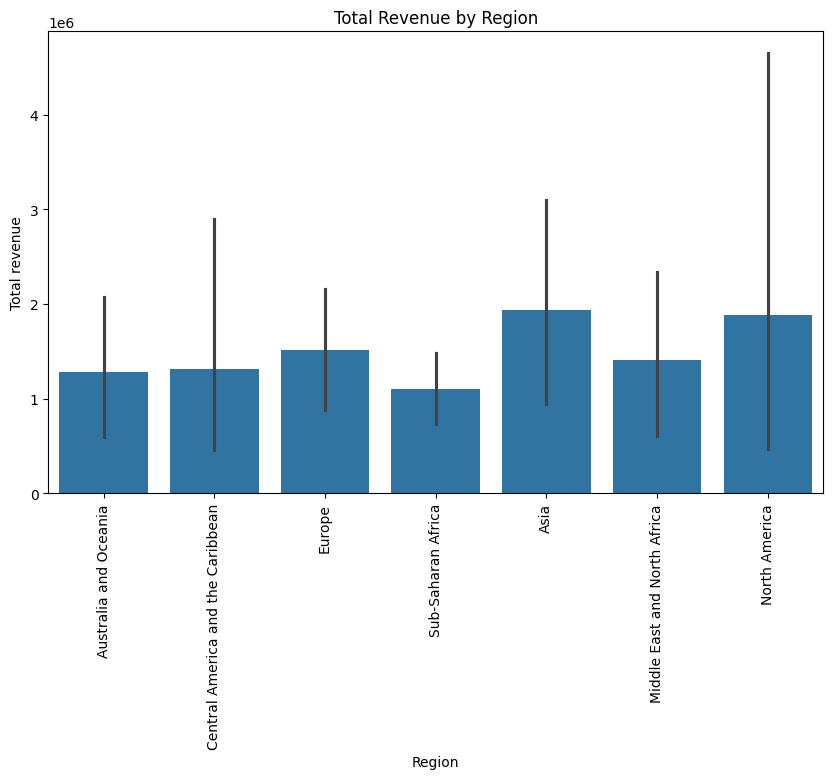

In [18]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Region', y = 'Total Revenue', data = data)
plt.xlabel('Region')
plt.ylabel('Total revenue')
plt.title('Total Revenue by Region')
plt.xticks(rotation = 90)
plt.show()


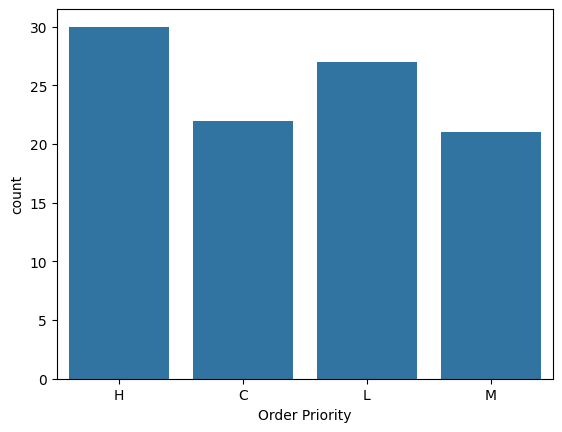

In [24]:
sns.countplot(x = 'Order Priority', data = data)
plt.show()

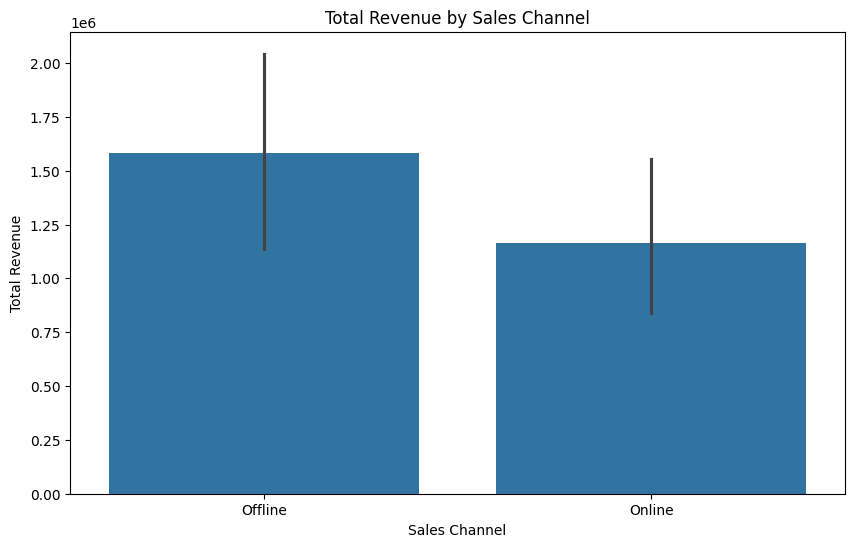

In [29]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Sales Channel',y = 'Total Revenue',data = data)
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Sales Channel')
plt.show()

# Advanced Analysis

In [42]:
data['Month'] = data["Order Date"].dt.to_period('M') #extract the month from Order date
data['Year'] = data["Order Date"].dt.to_period('Y') #extract the year from Order date
month_sales = data.groupby('Month')['Total Revenue'].sum() #groupby month and sum the Total Revenue
year_sales = data.groupby('Year')['Total Revenue'].sum() #groupby year and sum the Total Revenue

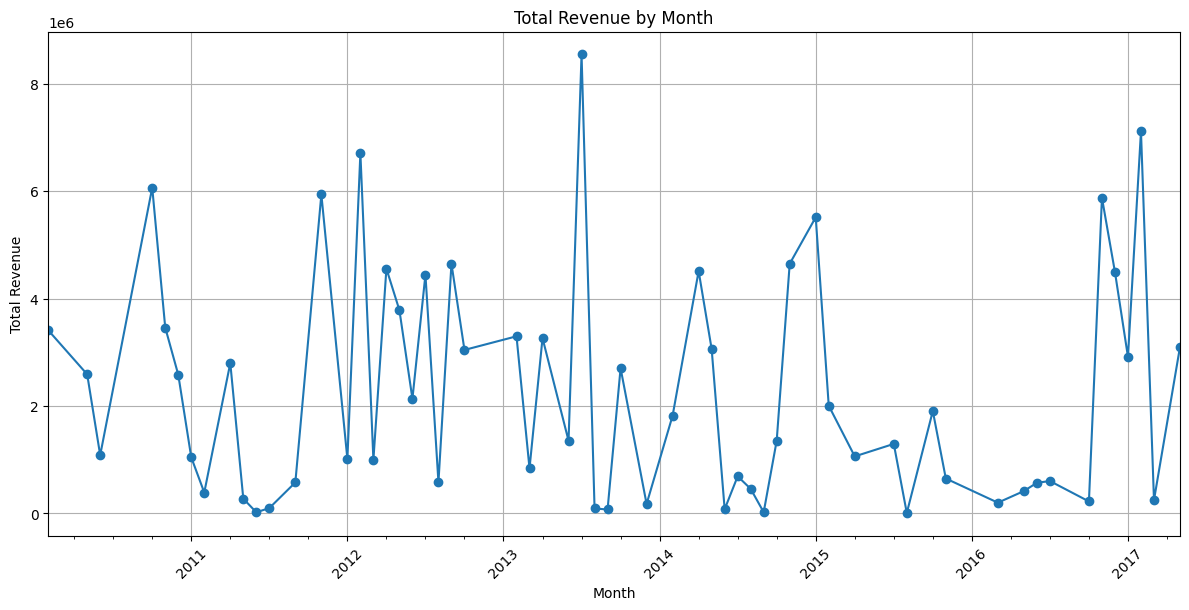

In [43]:
plt.figure(figsize = (12,6))
month_sales.plot(kind = 'line', marker = 'o')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

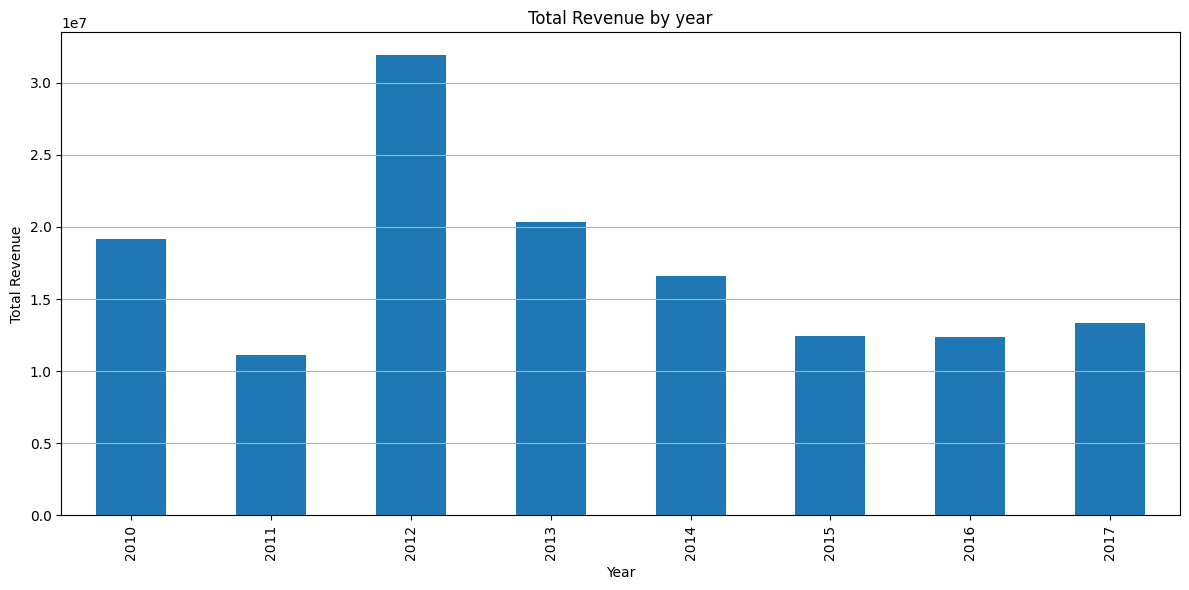

In [55]:
plt.figure(figsize = (12, 6))
year_sales.plot(kind = 'bar')
plt.title('Total Revenue by year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True, axis = 'y')
plt.tight_layout()
plt.show()

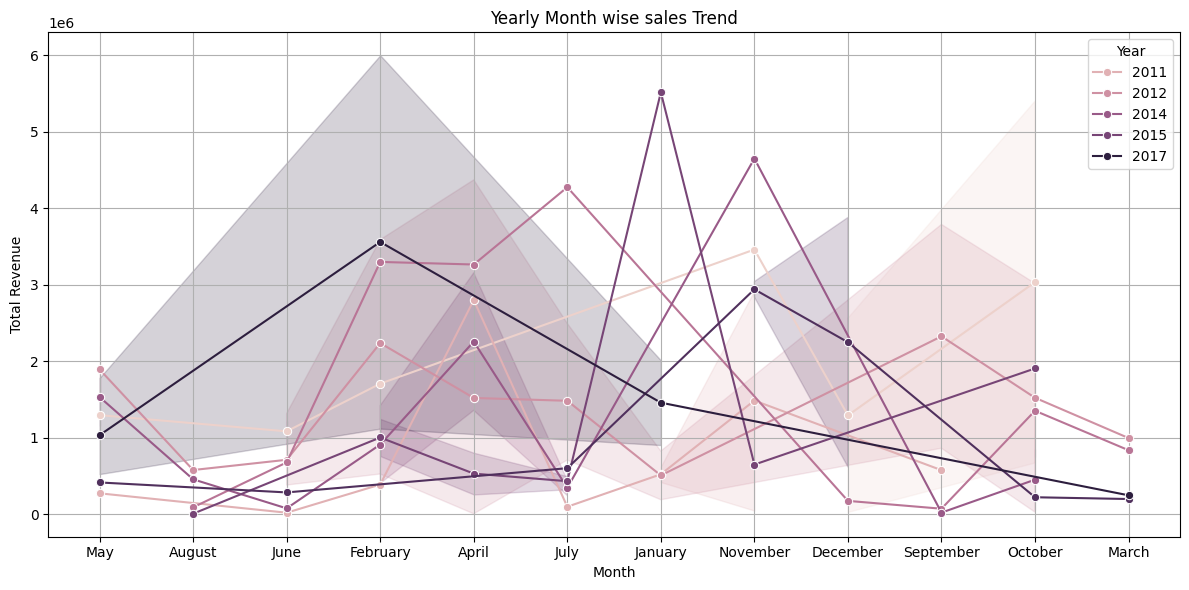

In [59]:
#convert 'Month' back to datetime for proper plotting
data['Month'] = data['Order Date'].dt.strftime('%B')
data['Year'] = data['Order Date'].dt.year
plt.figure(figsize = (12,6))
sns.lineplot(x ='Month', y = 'Total Revenue',hue ='Year', data = data, marker = 'o')
plt.title('Yearly Month Wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.legend(title = 'Year')
plt.tight_layout()
plt.show()


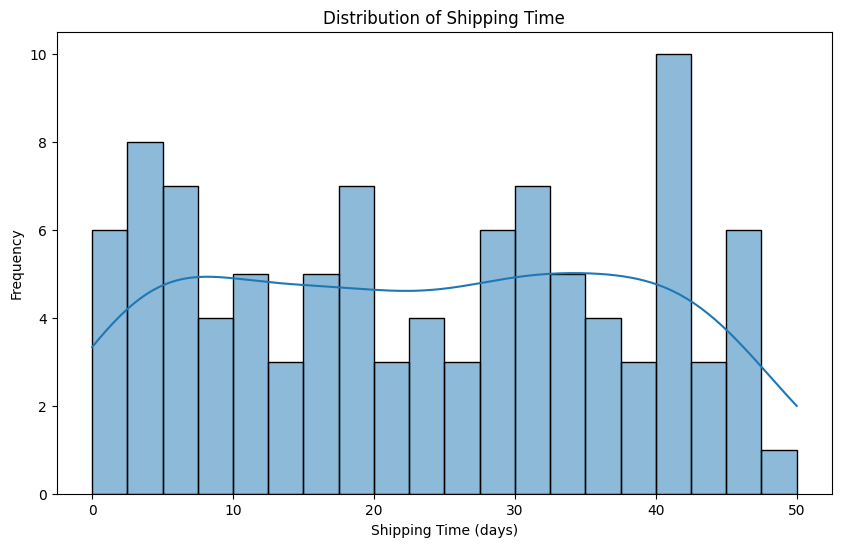

In [64]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Shipping Time'] = (data['Ship Date'] - data['Order Date']).dt.days
plt.figure(figsize = (10,6))
sns.histplot(data = data, x = 'Shipping Time', bins = 20, kde = True)
plt.title('Distribution of Shipping Time')
plt.xlabel('Shipping Time (days)')
plt.ylabel('Frequency')
plt.show()